In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv("Bitcoin_data.csv")

In [69]:
df

,Date,Open,High,Low,Close,Volume,Market_Cap,Tomorrow,Target
0,2023-07-20,29915.250326,30195.531037,29638.096675,29792.016378,1.465521e+10,5.790039e+11,29908.743899,1
1,2023-07-19,29862.047208,30184.181151,29794.268863,29913.923200,1.212860e+10,5.813487e+11,29792.016378,0
2,2023-07-18,30147.070861,30233.655349,29556.428373,29856.563223,1.313890e+10,5.802059e+11,29913.923200,1
3,2023-07-17,30249.626617,30336.400133,29685.782687,30145.889626,1.324016e+10,5.857975e+11,29856.563223,0
4,2023-07-16,30297.472111,30437.560732,30089.670384,30249.132810,8.516564e+09,5.877781e+11,30145.889626,0
...,...,...,...,...,...,...,...,...,...
3732,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,105.209999,0
3733,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,116.989998,0
3734,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09,139.000000,0
3735,2013-04-28,136.689455,143.365942,110.845593,127.954255,2.595684e+04,1.419008e+09,144.539993,1


In [70]:
x = df.drop(labels=['Target'],axis=1)
y = df[['Target']]

In [71]:
#numerical_cols = x.select_dtypes(exclude='object').columns

In [72]:
numerical_cols=['Open', 'High', 'Low', 'Close', 'Volume', 'Market_Cap']

In [73]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [74]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)
])

In [75]:
X_train = x.iloc[:-600]
X_test = x.iloc[-600:]
y_train = y.iloc[:-600]
y_test = y.iloc[-600:]

In [76]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [78]:
def evaluate_model(true, predicted):
    Accuracy_score = accuracy_score(true,predicted)
    return Accuracy_score

In [79]:
## Train multiple models

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'SVC':SVC()
}
model_list=[]
Accuracy_test=[]
y_predict = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
  
    y_pred=model.predict(X_test)
    
   
    accuracy_test=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    y_predict.append(y_pred)

    print('Model Training Performance')
   
    print("Accuracy_test:",accuracy_test*100)
    

    Accuracy_test.append(accuracy_test)
    
    print('='*65)
    print('\n')
    print(classification_report(y_test,y_pred))
    print('='*65)
    print('\n') 

e:\Bitcoin\venv2\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Bitcoin\venv2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Bitcoin\venv2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Bitcoin\venv2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are il

LogisticRegression
Model Training Performance
Accuracy_test: 51.16666666666667


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       293
           1       0.51      1.00      0.68       307

    accuracy                           0.51       600
   macro avg       0.26      0.50      0.34       600
weighted avg       0.26      0.51      0.35       600



DecisionTree
Model Training Performance
Accuracy_test: 50.16666666666667


              precision    recall  f1-score   support

           0       0.49      0.89      0.64       293
           1       0.56      0.13      0.21       307

    accuracy                           0.50       600
   macro avg       0.53      0.51      0.42       600
weighted avg       0.53      0.50      0.42       600





RandomForest
Model Training Performance
Accuracy_test: 54.333333333333336


              precision    recall  f1-score   support

           0       0.53      0.59      0.56       293
           1       0.56      0.50      0.53       307

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.55      0.54      0.54       600





e:\Bitcoin\venv2\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost
Model Training Performance
Accuracy_test: 48.333333333333336


              precision    recall  f1-score   support

           0       0.48      0.57      0.52       293
           1       0.49      0.40      0.44       307

    accuracy                           0.48       600
   macro avg       0.48      0.49      0.48       600
weighted avg       0.49      0.48      0.48       600





e:\Bitcoin\venv2\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting
Model Training Performance
Accuracy_test: 49.166666666666664


              precision    recall  f1-score   support

           0       0.49      0.78      0.60       293
           1       0.51      0.21      0.30       307

    accuracy                           0.49       600
   macro avg       0.50      0.50      0.45       600
weighted avg       0.50      0.49      0.45       600





e:\Bitcoin\venv2\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
Model Training Performance
Accuracy_test: 51.16666666666667


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       293
           1       0.51      1.00      0.68       307

    accuracy                           0.51       600
   macro avg       0.26      0.50      0.34       600
weighted avg       0.26      0.51      0.35       600





e:\Bitcoin\venv2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Bitcoin\venv2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Bitcoin\venv2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
df1 = pd.DataFrame({'model':model_list,'test_accuracy':Accuracy_test})
df1

,model,test_accuracy
0,LogisticRegression,0.511667
1,DecisionTree,0.501667
2,RandomForest,0.543333
3,Adaboost,0.483333
4,GradientBoosting,0.491667
5,SVC,0.511667


<AxesSubplot:xlabel='model'>

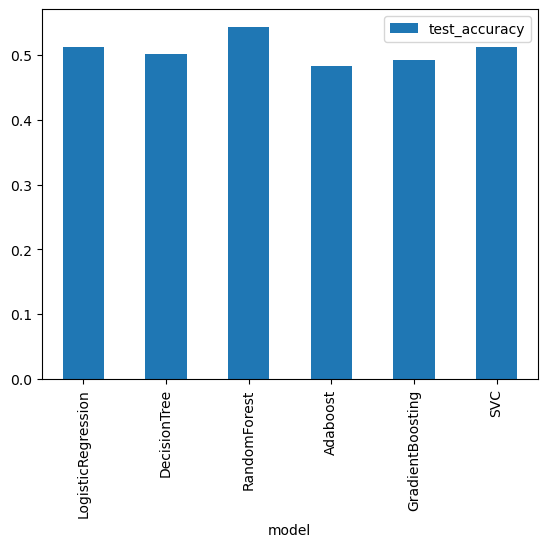

In [81]:
df1.plot(x='model',y=['test_accuracy'],kind='bar')